# Data Loading

## Mount the drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Combine all the data sheets and merge them as one

In [ ]:
import pandas as pd
import os

data_folder = '/content/drive/MyDrive/Colab Notebooks/SOFT_PROJECT/Data'
os.chdir(data_folder)

file_names = os.listdir(data_folder)
dfs = [pd.read_excel(os.path.join(data_folder, file) , skiprows=9) for file in file_names]

combined_data = pd.concat(dfs, ignore_index=True)

## Save the Data to drive

In [ ]:
## print(combined_data)
## output_file_path = '/content/drive/MyDrive/Colab Notebooks/SOFT_PROJECT/Data/combined_data.xlsx'
## combined_data.to_excel(output_file_path, index=False)

## print(f"Combined data exported to: {output_file_path}")


# Data Pre-Processing


## Fetch the combined data and convert it into data frame

In [ ]:
# View the structure of the merged DataFrame
input_file_path = '/content/drive/MyDrive/Colab Notebooks/SOFT_PROJECT/Data/combined_data.xlsx'
df = pd.read_excel(input_file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              1234 non-null   int64  
 1   DISTRICT        1234 non-null   object 
 2   UPAZILA         1234 non-null   object 
 3   RIVER           1234 non-null   object 
 4   STATION ID      1234 non-null   object 
 5   STATION         1234 non-null   object 
 6   DATETIME        1234 non-null   object 
 7   WATER LEVEL(m)  1 non-null      float64
 8   BP              197 non-null    float64
 9   TEMP(C)         861 non-null    float64
 10  PH(m)           1232 non-null   float64
 11  DO              1232 non-null   float64
 12  SALINITY(PPT)   1221 non-null   float64
 13  TDS(Mg/L)       1233 non-null   float64
 14  EC(MICROS)/CM   1233 non-null   float64
 15  TRANSPARENCY    299 non-null    float64
 16  FE(Mg/L)        1006 non-null   float64
 17  CI(Mg/L)        914 non-null    f

## Remove unnecessary features

In [ ]:
# Drop unwanted columns
df.drop(['LATITUDE', 'LONGITUDE' ,'SL' , 'DISTRICT' ,'UPAZILA','RIVER' ,'STATION ID','STATION' , 'WATER LEVEL(m)' , 'BP'], axis=1, inplace=True)

# Display the updated DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATETIME       1234 non-null   object 
 1   TEMP(C)        861 non-null    float64
 2   PH(m)          1232 non-null   float64
 3   DO             1232 non-null   float64
 4   SALINITY(PPT)  1221 non-null   float64
 5   TDS(Mg/L)      1233 non-null   float64
 6   EC(MICROS)/CM  1233 non-null   float64
 7   TRANSPARENCY   299 non-null    float64
 8   FE(Mg/L)       1006 non-null   float64
 9   CI(Mg/L)       914 non-null    float64
dtypes: float64(9), object(1)
memory usage: 96.5+ KB
None


## Fill the null values with Time-Based Interpolation

In [ ]:
# Convert 'DATETIME' to datetime format
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Set 'DATETIME' as the index
df.set_index('DATETIME', inplace=True)

# Perform time-based interpolation
df.interpolate(method='time', inplace=True)

# Reset the index if needed
df.reset_index(inplace=True)

# Display the updated DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATETIME       1234 non-null   datetime64[ns]
 1   TEMP(C)        1234 non-null   float64       
 2   PH(m)          1234 non-null   float64       
 3   DO             1234 non-null   float64       
 4   SALINITY(PPT)  1232 non-null   float64       
 5   TDS(Mg/L)      1234 non-null   float64       
 6   EC(MICROS)/CM  1234 non-null   float64       
 7   TRANSPARENCY   1232 non-null   float64       
 8   FE(Mg/L)       1198 non-null   float64       
 9   CI(Mg/L)       1198 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 96.5 KB
None


## Drop any rows with null values

In [ ]:
# Drop rows with any null values
df.dropna(inplace=True)

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATETIME       1198 non-null   datetime64[ns]
 1   TEMP(C)        1198 non-null   float64       
 2   PH(m)          1198 non-null   float64       
 3   DO             1198 non-null   float64       
 4   SALINITY(PPT)  1198 non-null   float64       
 5   TDS(Mg/L)      1198 non-null   float64       
 6   EC(MICROS)/CM  1198 non-null   float64       
 7   TRANSPARENCY   1198 non-null   float64       
 8   FE(Mg/L)       1198 non-null   float64       
 9   CI(Mg/L)       1198 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 93.7 KB
None


## Remove the outliers

In [ ]:
unfiltered_data = df
pureInputData = unfiltered_data[unfiltered_data['TEMP(C)'] >=15]

unfiltered_data = pureInputData
pureInputData = unfiltered_data[ (unfiltered_data['PH(m)'] <=14) & (unfiltered_data['PH(m)'] > 4) ]

unfiltered_data = pureInputData
pureInputData = unfiltered_data[ (unfiltered_data['DO'] <= 25)]

unfiltered_data = pureInputData
pureInputData = unfiltered_data[ (unfiltered_data['SALINITY(PPT)'] <= 5)]

unfiltered_data = pureInputData
pureInputData = unfiltered_data[ (unfiltered_data['TDS(Mg/L)'] <= 1000)]

unfiltered_data = pureInputData
pureInputData = unfiltered_data[ (unfiltered_data['EC(MICROS)/CM'] <= 2000)]

unfiltered_data = pureInputData
pureInputData = unfiltered_data[ (unfiltered_data['TRANSPARENCY'] <= 500)]

unfiltered_data = pureInputData
pureInputData = unfiltered_data[ (unfiltered_data['FE(Mg/L)'] <= 5)]

unfiltered_data = pureInputData
pureInputData = unfiltered_data[ (unfiltered_data['CI(Mg/L)'] <= 200)]

columns_to_abs = pureInputData.columns.difference(['DATETIME'])
pureInputData[columns_to_abs] = pureInputData[columns_to_abs].abs()

df = pureInputData
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 1197
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATETIME       922 non-null    datetime64[ns]
 1   TEMP(C)        922 non-null    float64       
 2   PH(m)          922 non-null    float64       
 3   DO             922 non-null    float64       
 4   SALINITY(PPT)  922 non-null    float64       
 5   TDS(Mg/L)      922 non-null    float64       
 6   EC(MICROS)/CM  922 non-null    float64       
 7   TRANSPARENCY   922 non-null    float64       
 8   FE(Mg/L)       922 non-null    float64       
 9   CI(Mg/L)       922 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 79.2 KB


<ipython-input-21-7f98deeaf6f1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pureInputData[columns_to_abs] = pureInputData[columns_to_abs].abs()


## Showing Box Plot for any potential outliers

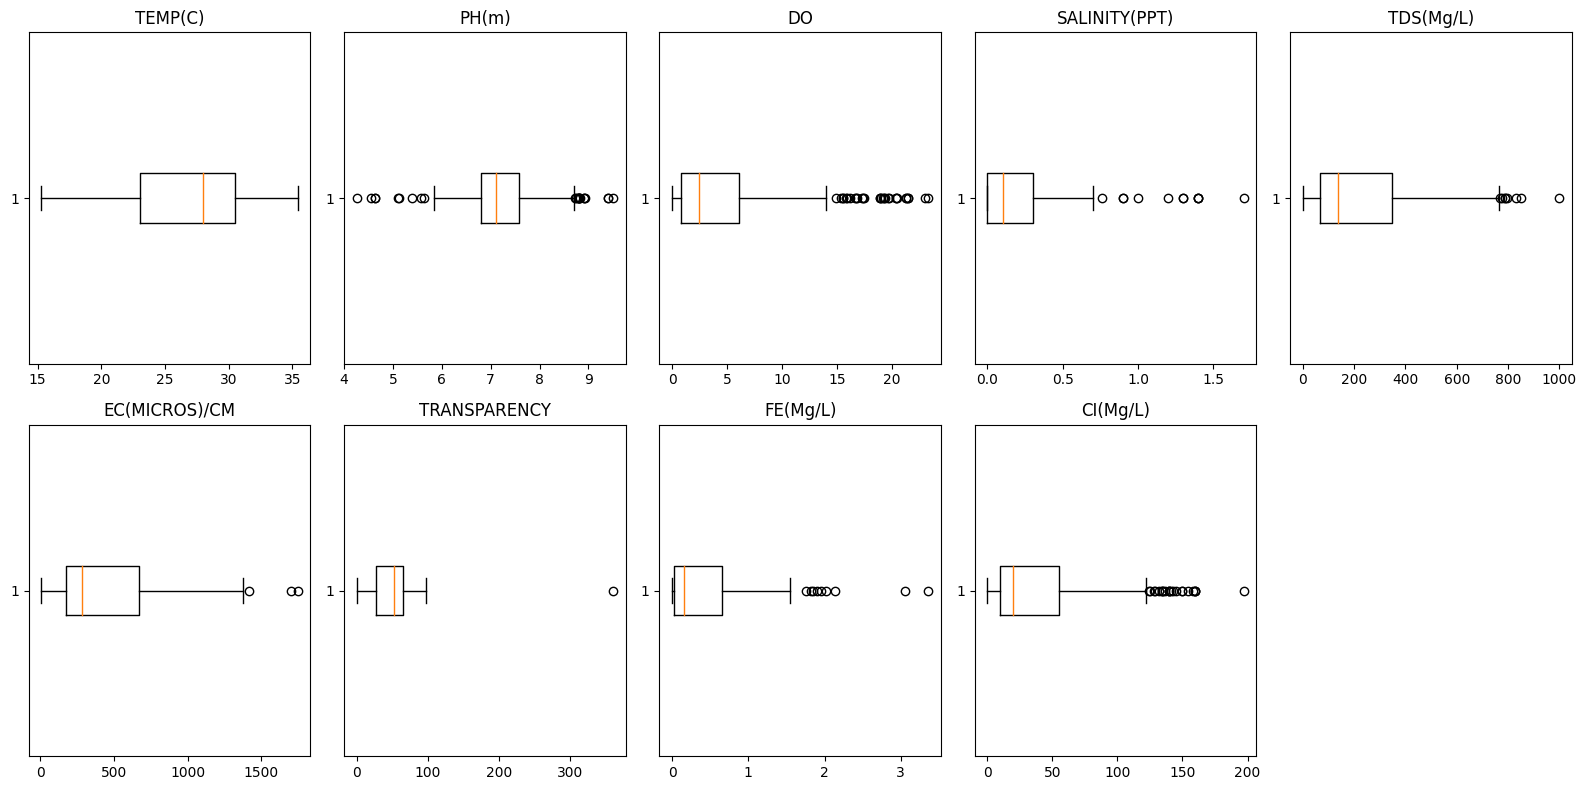

In [ ]:
import matplotlib.pyplot as plt

# Iterate through columns and create individual box plots
plt.figure(figsize=(16, 8))
for column in df.columns[1:]:  # Exclude 'DATETIME'
    plt.subplot(2, 5, df.columns.get_loc(column))
    plt.boxplot(df[column], vert=False)
    plt.title(column)

plt.tight_layout()
plt.show()


# Data Augmentation

## Sort the data According to date

In [ ]:
# Sort the DataFrame by date
df_sorted = df.sort_values(by='DATETIME')

# Display the sorted DataFrame
df = df_sorted

df.head()


,DATETIME,TEMP(C),PH(m),DO,SALINITY(PPT),TDS(Mg/L),EC(MICROS)/CM,TRANSPARENCY,FE(Mg/L),CI(Mg/L)
596,2001-04-14,30.8,7.85,6.8,0.05,357.0,715.0,22.86,1.0,3.0
774,2001-04-18,30.7,7.83,7.8,0.05,93.8,180.0,22.86,1.0,3.0
818,2001-04-19,31.1,7.61,6.9,0.05,90.8,181.3,22.86,1.0,3.0
178,2001-04-20,33.2,7.80,6.7,0.05,124.8,248.0,22.86,1.0,3.0
360,2001-04-22,31.4,6.80,7.0,0.05,247.5,495.0,22.86,1.0,3.0


## Generate Fake Data

In [ ]:
import pandas as pd

# Assuming 'df' is your original DataFrame with 'DATETIME' column
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Create a complete date range
complete_date_range = pd.date_range(start=df['DATETIME'].min(), end=df['DATETIME'].max(), freq='D')

# Create a DataFrame with the complete date range
complete_df = pd.DataFrame({'DATETIME': complete_date_range})

# Merge with the original DataFrame
merged_df = pd.merge(complete_df, df, on='DATETIME', how='left')

# Sort the merged DataFrame by date
merged_df = merged_df.sort_values(by='DATETIME')

df = merged_df

# Convert 'DATETIME' to datetime format
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Set 'DATETIME' as the index
df.set_index('DATETIME', inplace=True)

# Perform time-based interpolation
df.interpolate(method='time', inplace=True)

# Reset the index if needed
df.reset_index(inplace=True)

# Display the updated DataFrame
print(df.info())
main_data = df

output_file_path = '/content/drive/MyDrive/Colab Notebooks/SOFT_PROJECT/Data/main_data.xlsx'
main_data.to_excel(output_file_path, index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATETIME       8533 non-null   datetime64[ns]
 1   TEMP(C)        8533 non-null   float64       
 2   PH(m)          8533 non-null   float64       
 3   DO             8533 non-null   float64       
 4   SALINITY(PPT)  8533 non-null   float64       
 5   TDS(Mg/L)      8533 non-null   float64       
 6   EC(MICROS)/CM  8533 non-null   float64       
 7   TRANSPARENCY   8533 non-null   float64       
 8   FE(Mg/L)       8533 non-null   float64       
 9   CI(Mg/L)       8533 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 666.8 KB
None


# Calculation for WQI

## Finding mean , STD ,min , max

In [ ]:
statistics_summary = df.describe().transpose()[['mean', 'std', 'min', 'max']]
print(statistics_summary)

                     mean         std        min      max
TEMP(C)         25.090188    5.905009  15.290818    35.40
PH(m)            7.207029    0.666406   4.260000     9.50
DO               4.115831    3.347821   0.000000    23.30
SALINITY(PPT)    0.133261    0.161044   0.000000     1.70
TDS(Mg/L)      166.893554  166.274213   0.060000   998.00
EC(MICROS)/CM  363.566661  279.953791   6.460000  1746.00
TRANSPARENCY    42.168725   20.030975   0.200000   360.00
FE(Mg/L)         0.441198    0.428791   0.000000     3.36
CI(Mg/L)        29.186603   31.551099   0.260000   197.00


## Setting the standard values

In [ ]:
DATE =0
TEMP = 28
PH = 8.5
DO = 5
SALINITY = 0.5
TDS = 500
EC = 300
TRANSPARENCY = 28
FE = 0.3
CL = 250


K = 0.267971
# Using them make a array named STANDARD_VALUES

STANDARD_VALUES = [ DATE,TEMP, PH, DO, SALINITY, TDS, EC, TRANSPARENCY, FE, CL]
df.head()

,DATETIME,TEMP(C),PH(m),DO,SALINITY(PPT),TDS(Mg/L),EC(MICROS)/CM,TRANSPARENCY,FE(Mg/L),CI(Mg/L)
0,2001-04-14,30.800,7.850,6.80,0.05,357.0,715.00,22.86,1.0,3.0
1,2001-04-15,30.775,7.845,7.05,0.05,291.2,581.25,22.86,1.0,3.0
2,2001-04-16,30.750,7.840,7.30,0.05,225.4,447.50,22.86,1.0,3.0
3,2001-04-17,30.725,7.835,7.55,0.05,159.6,313.75,22.86,1.0,3.0
4,2001-04-18,30.700,7.830,7.80,0.05,93.8,180.00,22.86,1.0,3.0


## Calculating the WQI

## Getting the PH Q values


In [ ]:
import pandas as pd
import numpy as np


# Load data from Excel
water_ph_data = df[['PH(m)']].copy()

# Define the Q values corresponding to specific pH values
q_values = {
    2.0: 2,
    2.2:2,
    2.4:3,
    2.6:3,
    2.8:4,
    3.0: 4,
    3.2:5,
    3.6: 7,
    3.8:8,
    4.0: 9,
    4.1: 10,
    4.2:11,
    4.4:14,
    4.5: 15,
    4.6:17,
    4.8: 20,
    5.1: 30,
    6.2: 60,
    6.8: 83,
    7.0: 88,
    7.1: 90,
    7.2: 92,
    7.4: 93,
    7.6: 92,
    7.8: 90,
    8.0: 84,
    8.9: 52,
    9.7: 26,
    10.0: 20,
    10.3: 15,
    10.7: 11,
    10.8: 10,
    11.0: 8,
    11.5: 5,
    12.00001: 3,
}

# Function to calculate Q value for each pH value using interpolation
def calculate_q_value(ph):
    known_pH_values = list(q_values.keys())
    known_q_values = list(q_values.values())

    # Perform linear interpolation to find the Q value
    q_value = np.interp(ph, known_pH_values, known_q_values, left=None, right=None, period=None)
    return q_value

# Apply the Q value calculation to the 'pH' column in the DataFrame
water_ph_data['Q_value'] = water_ph_data['PH(m)'].apply(calculate_q_value)

# Display the resulting DataFrame with Q values
print(water_ph_data[['PH(m)', 'Q_value']])

#water_data.to_csv('filtered_data.csv', index = False)


      PH(m)    Q_value
0     7.850  88.500000
1     7.845  88.650000
2     7.840  88.800000
3     7.835  88.950000
4     7.830  89.100000
...     ...        ...
8528  7.000  88.000000
8529  6.830  83.750000
8530  6.720  79.933333
8531  6.900  85.500000
8532  6.500  71.500000

[8533 rows x 2 columns]


## Getting the temp Q value

In [ ]:
import pandas as pd
import numpy as np


# Load data from Excel
water_temp_data = df[['TEMP(C)']].copy()

# Define the Q values corresponding to specific Temperature values
q_values_temperature = {
    # Define Temperature values and corresponding Q values
    # Example:
    -10:55,
    -9:59,
    -8:63,
    -7:66,
    -6:70,
    -5:74,
    -4:78,
    -3:82,
    -2:85,
    -1:89,
    0:93,
    1:89,
    2:85,
    3:81,
    4:77,
    5:73,
    6:67,
    7:61,
    8:56,
    9:50,
    10:45,
    11:40,
    12:36,
    13:34,
    14:33,
    15:31,
    16:29,
    17:27,
    18:26,
    19:24,
    20:22,
    21:20,
    22:19,
    23:18,
    24:17,
    25:16,
    26:14,
    27:13,
    28:12,
    29:11,
    30:10

}

# Function to calculate Q value for each Temperature value using interpolation
def calculate_q_value_temperature(temperature):
    known_temperature_values = list(q_values_temperature.keys())
    known_q_values = list(q_values_temperature.values())

    # Perform linear interpolation to find the Q value
    q_value_temperature = np.interp(temperature, known_temperature_values, known_q_values, left=None, right=None, period=None)
    return q_value_temperature

# Apply the Q value calculation to the 'Temperature' column in the DataFrame
water_temp_data['Q_value_Temperature'] = water_temp_data['TEMP(C)'].apply(calculate_q_value_temperature)

# Display the resulting DataFrame with Q values for Temperature
print(water_temp_data[['TEMP(C)', 'Q_value_Temperature']])
#water_data_temperature.to_csv('filtered_data.csv', index = False)


      TEMP(C)  Q_value_Temperature
0      30.800                 10.0
1      30.775                 10.0
2      30.750                 10.0
3      30.725                 10.0
4      30.700                 10.0
...       ...                  ...
8528   31.100                 10.0
8529   31.800                 10.0
8530   31.800                 10.0
8531   31.000                 10.0
8532   31.000                 10.0

[8533 rows x 2 columns]


## Getting the TDS Q value

In [ ]:
import pandas as pd
import numpy as np


# Load data from Excel

water_tds_data = df[['TDS(Mg/L)']].copy()

# Define the Q values corresponding to specific TDS values
q_values_tds = {
       0:79,
       10:82,
       20:84,
       30:85,
       40:86,
       50:87,
       60:87,
       70:86,
       80:85,
       90:84,
       100:83,
       110:83,
       120:82,
       130:81,
       140:80,
       150:79,
       160:78,
       170:76,
       180:75,
       190:74,
       200:73,
       210:71,
       220:70,
       230:69,
       240:67,
       250:66,
       260:65,
       270:63,
       280:62,
       290:61,
       300:60,
       310:58,
       320:57,
       330:56,
       340:54,
       350:53,
       360:52,
       370:50,
       380:49,
       390:48,
       400:47,
       410:45,
       420:44,
       430:43,
       440:41,
       450:40,
       460:38,
       470:36,
       480:35,
       490:33,
       500:31,
       501:20,

}

# Function to calculate Q value for each TDS value using interpolation
def calculate_q_value_tds(tds):
    known_tds_values = list(q_values_tds.keys())
    known_q_values = list(q_values_tds.values())

    # Perform linear interpolation to find the Q value
    q_value_tds = np.interp(tds, known_tds_values, known_q_values, left=None, right=None, period=None)
    return q_value_tds

# Apply the Q value calculation to the 'TDS' column in the DataFrame
water_tds_data['Q_value_TDS'] = water_tds_data['TDS(Mg/L)'].apply(calculate_q_value_tds)

# Display the resulting DataFrame with Q values for TDS
print(water_tds_data[['TDS(Mg/L)', 'Q_value_TDS']])
#water_data.to_csv('filtered_data.csv', index = False)


      TDS(Mg/L)  Q_value_TDS
0         357.0        52.30
1         291.2        60.88
2         225.4        69.46
3         159.6        78.04
4          93.8        83.62
...         ...          ...
8528       97.0        83.30
8529      147.0        79.30
8530      117.0        82.30
8531      196.0        73.40
8532      142.0        79.80

[8533 rows x 2 columns]


## Q values for DO

In [ ]:
# Load data from Excel
water_do_data = df[['DO']].copy()

# Define the Q values corresponding to specific DO values
q_values_do = {
    0: 25,
    1: 30,
    2: 35,
    3: 40,
    4: 45,
    5: 50,
    6: 55,
    7: 60,
    8: 65,
    9: 70,
    10: 75,
    11: 80,
    12: 85,
    13: 90,
    14: 95,
    15: 100,
}

# Function to calculate Q value for each DO value using interpolation
def calculate_q_value_do(do):
    known_do_values = list(q_values_do.keys())
    known_q_values = list(q_values_do.values())

    # Perform linear interpolation to find the Q value
    q_value_do = np.interp(do, known_do_values, known_q_values, left=None, right=None, period=None)
    return q_value_do

# Apply the Q value calculation to the 'DO' column in the DataFrame
water_do_data['Q_value_DO'] = water_do_data['DO'].apply(calculate_q_value_do)

# Display the resulting DataFrame with Q values for DO
print(water_do_data[['DO', 'Q_value_DO']])


        DO  Q_value_DO
0     6.80       59.00
1     7.05       60.25
2     7.30       61.50
3     7.55       62.75
4     7.80       64.00
...    ...         ...
8528  1.00       30.00
8529  2.11       35.55
8530  2.00       35.00
8531  2.09       35.45
8532  1.91       34.55

[8533 rows x 2 columns]


In [ ]:

# Formula: WQI = Summation of (Wi * Qi)
# Wi for each column is (K/Standard Value of that column)
# Qi for each column is (Value of that column / Standard Value of that column) except the PH and DO columns
# for PH column Qi is absolute of ((value of that column - 7) / (Standard Value of that column - 7))
# for DO column Qi is absolute of ((value of that column - 14.6) / (Standard Value of that column - 14.6))
# Do this only for the first 9 rows

## Add a new column to the dataframe named as WQI
pureInputData = df
pureInputData['WQI'] = 0

pureInputData.head()

for index, row in pureInputData.iterrows():
    summation = 0
    # if index == 2:
    #     break
    for i in range(1, 10):
        if i == 2:
            wiqi = (K / STANDARD_VALUES[i]) * abs((row[i] - 7) / (STANDARD_VALUES[i] - 7))
        elif i == 3:
            wiqi = (K / STANDARD_VALUES[i]) * abs((row[i] - 14.6) / (STANDARD_VALUES[i] - 14.6))
        else:
            wiqi = (K / STANDARD_VALUES[i]) * abs(row[i] / STANDARD_VALUES[i])
        summation += wiqi

    pureInputData.at[index, 'WQI'] = (summation*100)
    # print("WQI = ", summation)


df = pureInputData
df.head()

,DATETIME,TEMP(C),PH(m),DO,SALINITY(PPT),TDS(Mg/L),EC(MICROS)/CM,TRANSPARENCY,FE(Mg/L),CI(Mg/L),WQI
0,2001-04-14,30.800,7.850,6.80,0.05,357.0,715.00,22.86,1.0,3.0,311.332516
1,2001-04-15,30.775,7.845,7.05,0.05,291.2,581.25,22.86,1.0,3.0,311.134708
2,2001-04-16,30.750,7.840,7.30,0.05,225.4,447.50,22.86,1.0,3.0,310.936900
3,2001-04-17,30.725,7.835,7.55,0.05,159.6,313.75,22.86,1.0,3.0,310.739092
4,2001-04-18,30.700,7.830,7.80,0.05,93.8,180.00,22.86,1.0,3.0,310.541284


## Assigning Class to each WQI

In [ ]:
# Define a function to assign grades
def assign_grade(wqi):
    if wqi <= 25:
        return 1
    elif wqi <= 50:
        return 2
    elif wqi <= 75:
        return 3
    elif wqi <= 100:
        return 4
    else:
        return 5

# Apply the function to create the 'GRADE' column
df['GRADE'] = df['WQI'].apply(assign_grade)

# Display the updated DataFrame
df.head()

,DATETIME,TEMP(C),PH(m),DO,SALINITY(PPT),TDS(Mg/L),EC(MICROS)/CM,TRANSPARENCY,FE(Mg/L),CI(Mg/L),WQI,GRADE
0,2001-04-14,30.800,7.850,6.80,0.05,357.0,715.00,22.86,1.0,3.0,311.332516,5
1,2001-04-15,30.775,7.845,7.05,0.05,291.2,581.25,22.86,1.0,3.0,311.134708,5
2,2001-04-16,30.750,7.840,7.30,0.05,225.4,447.50,22.86,1.0,3.0,310.936900,5
3,2001-04-17,30.725,7.835,7.55,0.05,159.6,313.75,22.86,1.0,3.0,310.739092,5
4,2001-04-18,30.700,7.830,7.80,0.05,93.8,180.00,22.86,1.0,3.0,310.541284,5


## Count Total Different Classes

In [ ]:
grade_counts = df['GRADE'].value_counts()

print("Grade Counts:")
print(grade_counts)


Grade Counts:
5    3980
2    1620
3    1535
1     724
4     674
Name: GRADE, dtype: int64


# Visualization of data

## Distribution of Grades In Dataset

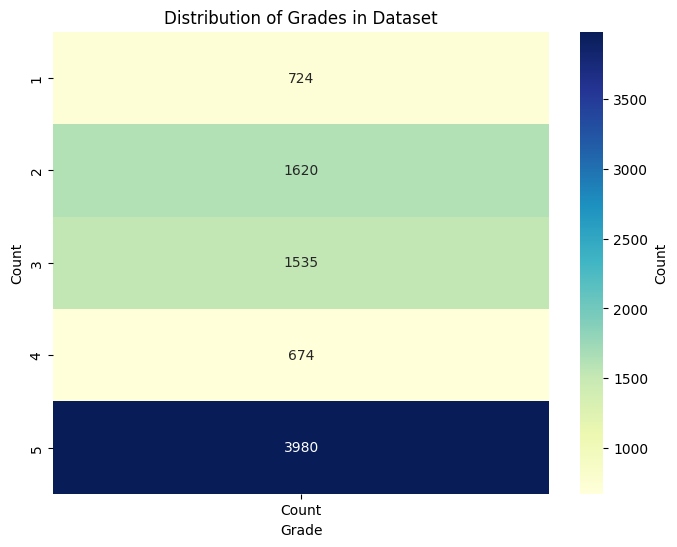

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
grade_counts = df['GRADE'].value_counts().sort_index()

# Create a DataFrame for the heatmap
heatmap_data = pd.DataFrame({'Count': grade_counts.values}, index=grade_counts.index)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(data=heatmap_data, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Count'})
plt.title('Distribution of Grades in Dataset')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


## Correlation Matrix

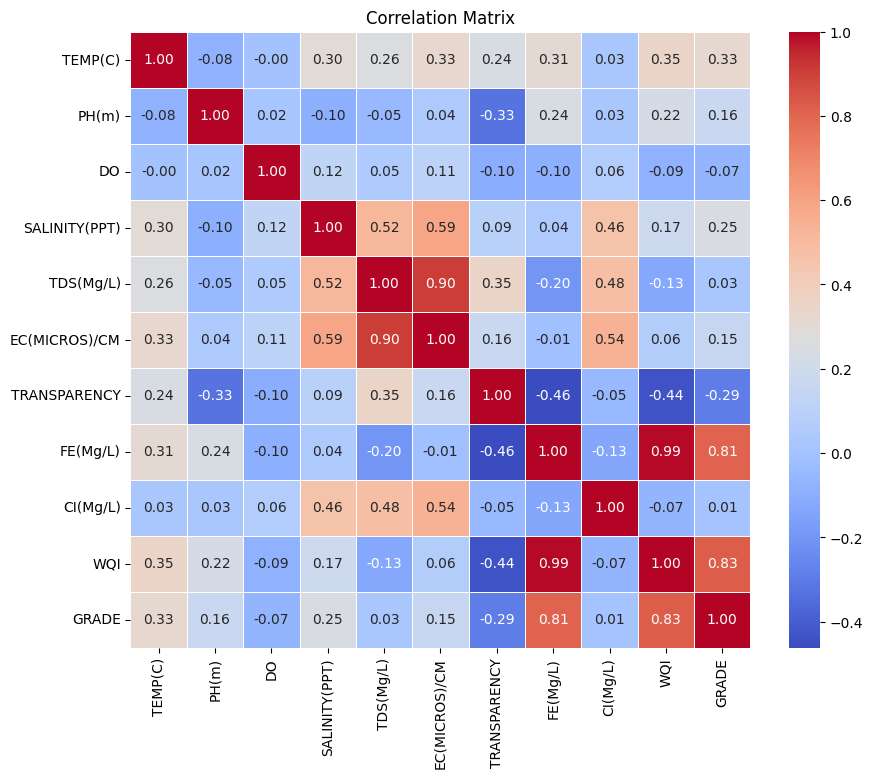

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# Usage of different Models

## LSTM

### Import The Necessary Modules

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

###  Load and preprocess the data

In [ ]:
# df.reset_index(inplace=True)
lstm_df = df
lstm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATETIME       8533 non-null   datetime64[ns]
 1   TEMP(C)        8533 non-null   float64       
 2   PH(m)          8533 non-null   float64       
 3   DO             8533 non-null   float64       
 4   SALINITY(PPT)  8533 non-null   float64       
 5   TDS(Mg/L)      8533 non-null   float64       
 6   EC(MICROS)/CM  8533 non-null   float64       
 7   TRANSPARENCY   8533 non-null   float64       
 8   FE(Mg/L)       8533 non-null   float64       
 9   CI(Mg/L)       8533 non-null   float64       
 10  WQI            8533 non-null   float64       
 11  GRADE          8533 non-null   int64         
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 800.1 KB


In [ ]:
lstm_df = lstm_df[['DATETIME', 'WQI']].copy()
lstm_df['DATETIME'] = pd.to_datetime(lstm_df['DATETIME'])

# Define the number of time steps
n_steps = 5  # You can adjust this based on your data

# Set 'DATETIME' as the index
lstm_df.set_index('DATETIME', inplace=True)

# Create sequences for LSTM
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data.iloc[i:(i + n_steps)].values)
        y.append(data.iloc[i + n_steps].values)
    return np.array(X), np.array(y)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(lstm_df), columns=lstm_df.columns)

# Create sequences for LSTM
X, y = create_sequences(df_scaled, n_steps)



### Split the data into train, validation, and test sets

In [ ]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Build the LSTM model

Epoch 1/50
40/40 [==============================] - 0s 2ms/step
Epoch 1 - Mean Squared Error: 888.0084, Root Mean Squared Error: 29.7995
187/187 [==============================] - 4s 11ms/step - loss: 0.0055 - val_loss: 8.2306e-04
Epoch 2/50
40/40 [==============================] - 0s 2ms/step
Epoch 2 - Mean Squared Error: 822.5616, Root Mean Squared Error: 28.6803
187/187 [==============================] - 1s 5ms/step - loss: 0.0014 - val_loss: 7.6240e-04
Epoch 3/50
40/40 [==============================] - 0s 2ms/step
Epoch 3 - Mean Squared Error: 734.5592, Root Mean Squared Error: 27.1028
187/187 [==============================] - 1s 5ms/step - loss: 0.0013 - val_loss: 6.8083e-04
Epoch 4/50
40/40 [==============================] - 0s 2ms/step
Epoch 4 - Mean Squared Error: 679.2159, Root Mean Squared Error: 26.0618
187/187 [==============================] - 1s 5ms/step - loss: 0.0013 - val_loss: 6.2954e-04
Epoch 5/50
40/40 [==============================] - 0s 2ms/step
Epoch 5 - Mean 

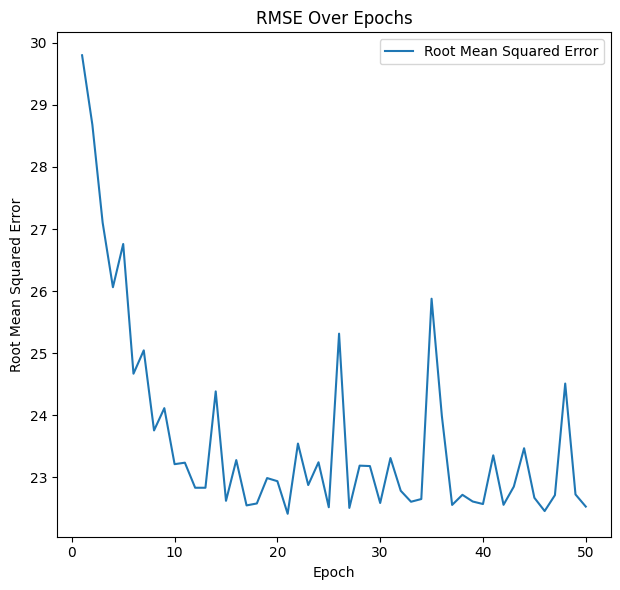

In [ ]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

class MetricsCallback(Callback):
    def __init__(self):
        self.mse_values = []
        self.rmse_values = []
        self.epochs = []

    def on_epoch_end(self, epoch, logs=None):
        # Make predictions on the validation set
        y_pred = self.model.predict(X_val)

        # Convert predictions back to original scale
        y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

        # Convert ground truth to original scale
        y_val_original = scaler.inverse_transform(y_val)

        # Calculate mean squared error and root mean squared error
        mse = mean_squared_error(y_val_original, y_pred)
        rmse = np.sqrt(mse)

        # Log and store the values
        print(f'Epoch {epoch + 1} - Mean Squared Error: {mse:.4f}, Root Mean Squared Error: {rmse:.4f}')
        self.mse_values.append(mse)
        self.rmse_values.append(rmse)
        self.epochs.append(epoch + 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train the model with the custom callback
metrics_callback = MetricsCallback()
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[metrics_callback])

# Create separate graphs for MSE and RMSE
plt.figure(figsize=(12, 6))

# Plot RMSE
plt.subplot(1, 2, 2)
plt.plot(metrics_callback.epochs, metrics_callback.rmse_values, label='Root Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


### Train the model

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
187/187 [==============================] - 1s 4ms/step - loss: 0.0011 - val_loss: 5.2973e-04
Epoch 2/50
187/187 [==============================] - 1s 4ms/step - loss: 0.0011 - val_loss: 4.8263e-04
Epoch 3/50
187/187 [==============================] - 1s 4ms/step - loss: 0.0011 - val_loss: 4.7961e-04
Epoch 4/50
187/187 [==============================] - 1s 5ms/step - loss: 0.0011 - val_loss: 5.3906e-04
Epoch 5/50
187/187 [==============================] - 1s 4ms/step - loss: 0.0011 - val_loss: 5.2179e-04
Epoch 6/50
187/187 [==============================] - 1s 4ms/step - loss: 0.0011 - val_loss: 4.9630e-04
Epoch 7/50
187/187 [==============================] - 1s 4ms/step - loss: 0.0011 - val_loss: 5.3367e-04
Epoch 8/50
187/187 [==============================] - 1s 5ms/step - loss: 0.0011 - val_loss: 4.7416e-04
Epoch 9/50
187/187 [==============================] - 1s 6ms/step - loss: 0.0011 - val_loss: 4.9481e-04
Epoch 10/50
187/187 [==============================] - 1s 6ms/st

### Evaluate the model on the test set

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {loss}')


40/40 [==============================] - 0s 2ms/step - loss: 9.5508e-04
Mean Squared Error on Test Set: 0.0009550791000947356


### Make predictions on the test set



In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions back to original scale
predictions = scaler.inverse_transform(predictions)


40/40 [==============================] - 0s 2ms/step


## GRU

### Import the necessary modules

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.model_selection import train_test_split

In [ ]:
gru_df = df
gru_df.head()
gru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATETIME       8533 non-null   datetime64[ns]
 1   TEMP(C)        8533 non-null   float64       
 2   PH(m)          8533 non-null   float64       
 3   DO             8533 non-null   float64       
 4   SALINITY(PPT)  8533 non-null   float64       
 5   TDS(Mg/L)      8533 non-null   float64       
 6   EC(MICROS)/CM  8533 non-null   float64       
 7   TRANSPARENCY   8533 non-null   float64       
 8   FE(Mg/L)       8533 non-null   float64       
 9   CI(Mg/L)       8533 non-null   float64       
 10  WQI            8533 non-null   float64       
 11  GRADE          8533 non-null   int64         
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 800.1 KB


### 2. Load and process the data

In [ ]:
features = gru_df.drop(['DATETIME', 'WQI', 'GRADE'], axis=1)
target = gru_df['WQI']

# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Define a function to create sequences for GRU
def create_sequences(features, target, n_steps):
    X, y = [], []
    for i in range(len(features) - n_steps):
        X.append(features.iloc[i:(i + n_steps)].values)
        y.append(target.iloc[i + n_steps])
    return np.array(X), np.array(y)  # Return NumPy arrays

### 3. Split data into train, validation, test

In [ ]:
n_steps = 5  # You can adjust this based on your data
X, y = create_sequences(pd.DataFrame(features_scaled), target, n_steps)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### 4. Build the GRU model

In [ ]:
model = Sequential()
model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

### 5. Train the GRU model

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
160/160 [==============================] - 2s 6ms/step - loss: 25226.2520 - val_loss: 10206.6865
Epoch 2/50
160/160 [==============================] - 1s 4ms/step - loss: 5058.1099 - val_loss: 2850.0254
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 2563.0676 - val_loss: 2115.4768
Epoch 4/50
160/160 [==============================] - 1s 5ms/step - loss: 2354.8672 - val_loss: 2285.0840
Epoch 5/50
160/160 [==============================] - 1s 6ms/step - loss: 2372.5117 - val_loss: 2177.2637
Epoch 6/50
160/160 [==============================] - 1s 6ms/step - loss: 2297.4075 - val_loss: 2035.1023
Epoch 7/50
160/160 [==============================] - 1s 7ms/step - loss: 2292.8074 - val_loss: 2005.5129
Epoch 8/50
160/160 [==============================] - 1s 4ms/step - loss: 2262.3250 - val_loss: 2050.0618
Epoch 9/50
160/160 [==============================] - 1s 4ms/step - loss: 2243.4473 - val_loss: 1983.0970
Epoch 10/50
160/160 [=======================

### 6. Evaluate the model on the test set

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")

54/54 [==============================] - 0s 2ms/step - loss: 1567.6074
Test Loss: 1567.6074


### 7. Make predictions on the test set

In [ ]:
y_pred = model.predict(X_test)
print(y_pred.shape)

54/54 [==============================] - 0s 2ms/step
(1706, 1)


In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming y_test is the actual target values
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse:.4f}')


Mean Squared Error: 1567.6077
Root Mean Squared Error: 39.5930
